In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [298]:
df=pd.read_csv("smriti nagar.csv")
df.head()

,date,population
0,02-01-2022,66
1,14-02-2022,62
2,23-03-2022,59
3,05-04-2022,52
4,29-05-2022,55


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        14 non-null     object
 1   population  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


In [300]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [311]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-311-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [312]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [313]:
 from prophet import Prophet

In [314]:
population=df.groupby('date')['population'].sum().reset_index()

In [315]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [316]:
model=Prophet(interval_width=0.95)

In [317]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/g_dduaba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/v761w44f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78451', 'data', 'file=/tmp/tmpqki2d_87/g_dduaba.json', 'init=/tmp/tmpqki2d_87/v761w44f.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelxie9h562/prophet_model-20230421065153.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:51:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:51:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [318]:
future_dates=model.make_future_dataframe(periods=30)

In [319]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-01  30.384486   52.666302   69.559096    30.384486    30.384486   
1  2022-02-14  30.466150   50.661214   67.237308    30.466150    30.466150   
2  2022-03-23  30.698577   44.454077   61.310159    30.698577    30.698577   
3  2022-05-04  30.962413   44.899481   61.148859    30.962413    30.962413   
4  2022-05-29  31.119458   44.981573   61.930665    31.119458    31.119458   
5  2022-07-06  31.358167   45.063385   61.867549    31.358167    31.358167   
6  2022-07-19  31.439831   53.365202   69.836592    31.439831    31.439831   
7  2022-09-08  31.760204   43.176547   59.207935    31.760204    31.760204   
8  2022-09-12  31.785331   51.895585   68.573985    31.785331    31.785331   
9  2022-09-18  31.823029   45.967828   61.242493    31.823029    31.823029   
10 2022-11-10  32.156873   42.655649   59.265223    32.156873    32.156873   
11 2022-11-23  32.238942   46.049366   62.103324    32.238942   

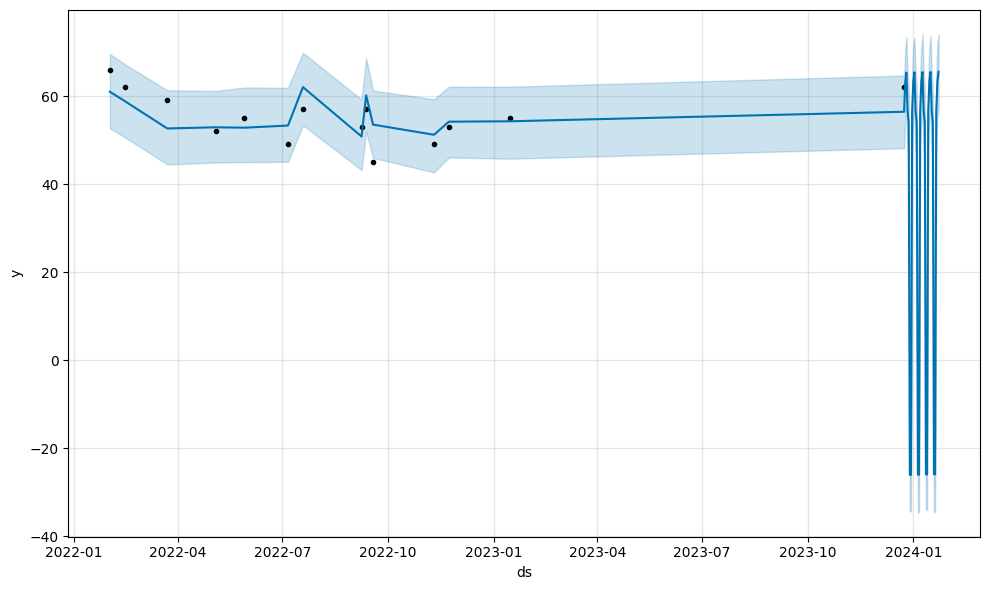

In [320]:
model.plot(forecast)
print(forecast)

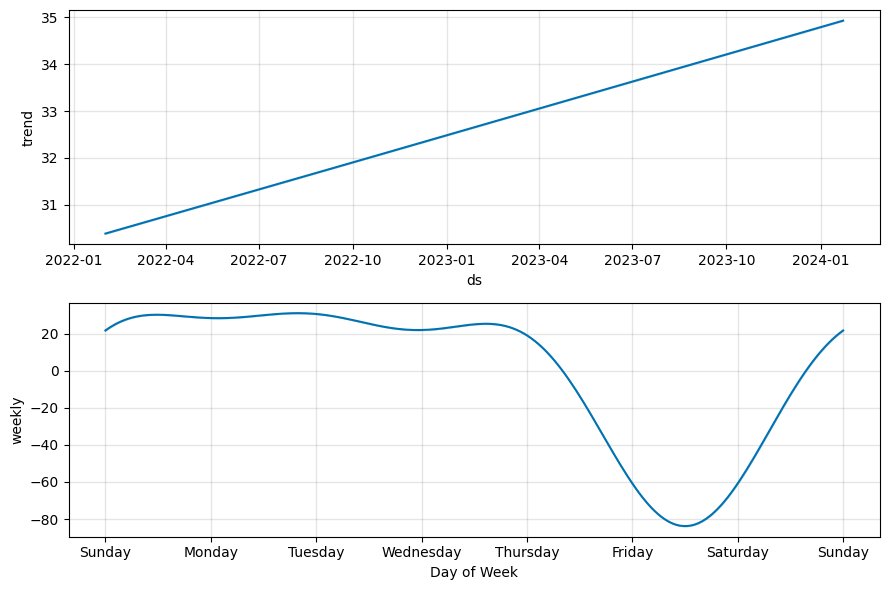

In [321]:
component=model.plot_components(forecast)

In [322]:
 model1=Prophet(interval_width=0.95)

In [323]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/_bt307d_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/0kx5hulx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16992', 'data', 'file=/tmp/tmpqki2d_87/_bt307d_.json', 'init=/tmp/tmpqki2d_87/0kx5hulx.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model_btjc5mc/prophet_model-20230421065226.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:52:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:52:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [324]:
future_dates=model1.make_future_dataframe(periods=10)

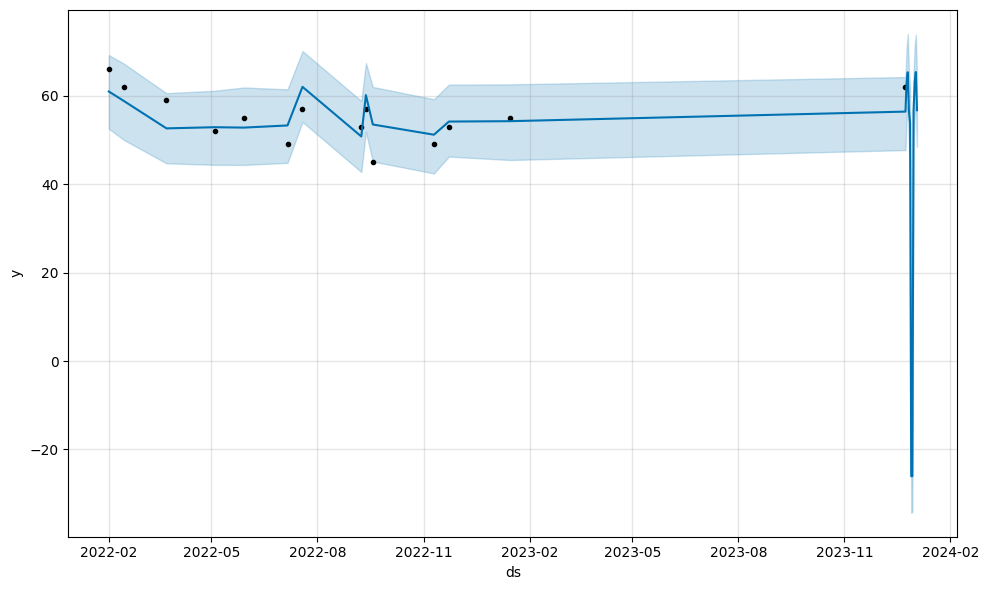

In [325]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-01  30.384486   52.549567   69.209106    30.384486    30.384486   
1  2022-02-14  30.466150   50.027986   67.291053    30.466150    30.466150   
2  2022-03-23  30.698577   44.723263   60.601947    30.698577    30.698577   
3  2022-05-04  30.962413   44.387224   61.147902    30.962413    30.962413   
4  2022-05-29  31.119458   44.363929   61.879948    31.119458    31.119458   
5  2022-07-06  31.358167   44.830834   61.464076    31.358167    31.358167   
6  2022-07-19  31.439831   54.085641   70.125347    31.439831    31.439831   
7  2022-09-08  31.760204   42.763390   58.838279    31.760204    31.760204   
8  2022-09-12  31.785331   51.806203   67.414395    31.785331    31.785331   
9  2022-09-18  31.823029   45.130188   62.007428    31.823029    31.823029   
10 2022-11-10  32.156873   42.439776   59.222506    32.156873    32.156873   
11 2022-11-23  32.238942   46.254879   62.537265    32.238942   

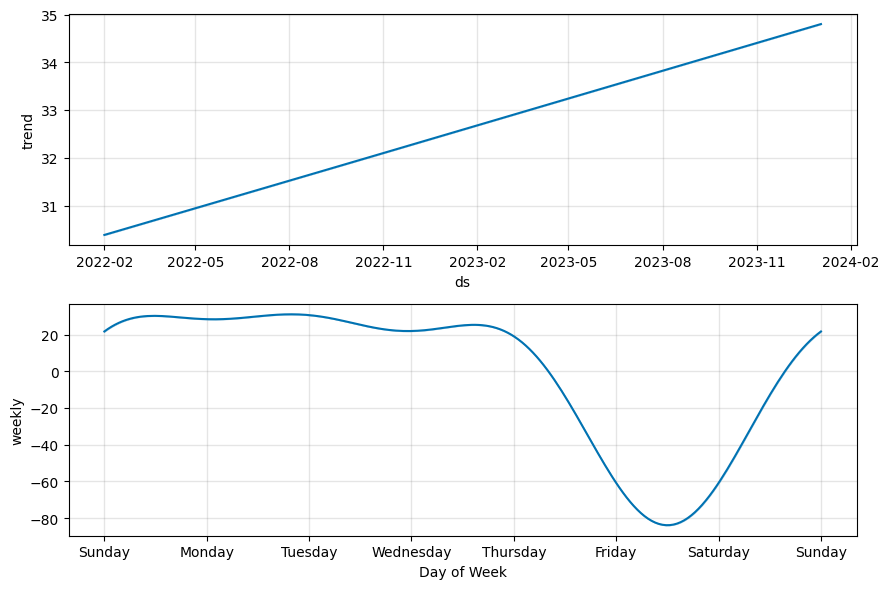

In [326]:
week=model1.plot_components(forecasting)
print(forecasting)